# Statistical Foundations of Machine Learning: Project

## Introduction
This notebook was created as part of the coursework for Statistical Foundations of Machine Learning, a master's course in Artificial Intelligence at the VUB (Vrije Universiteit Brussel). In this interactive notebook we will try to answer 3 research questions by applying ML algorithms to both synthetic and real datasets.

Before this running this notebook, please install the following python packages: 
- numpy
- matplotlib
- scipy
- scikit-learn
- pandas

In [1]:
import sys
sys.prefix
!{sys.executable} -m pip install numpy matplotlib scipy pandas scikit-multilearn
!pip uninstall imbalanced-learn -y
#!pip uninstall scikit-learn -y
!pip install scikit-learn==0.24.1

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import pandas as pd
from scipy import stats
import scipy as sp

Generating a synthetic classification dataset in 2 dimensions. Datapoints are uniformly distributed in the 2 dimensional input plane. The classification of the points is decided by a user defined separation_boundary.

In [3]:
def generate_uniform_classification_data(n, separation_boundary, x0min=0, x0max=1, x1min=0, x1max=1):
    x0distr = stats.uniform(loc=x0min, scale=x0max-x0min)
    x1distr = stats.uniform(loc=x1min, scale=x1max-x1min)
    x0s = x0distr.rvs(size=n)
    x1s = x1distr.rvs(size=n)
    X = np.array(list(zip(x0s, x1s)))
    y = np.sign([separation_boundary(xi) for xi in X])
    y = np.where(y == 0, 1, y)
    return X, y

def generate_normally_distributed_points(n, means, co_variances):
    distr = stats.multivariate_normal(means, co_variances)
    ### Code from https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html#scipy.stats.multivariate_normal    
    
    return distr.rvs(size=n)

def plot_labeled_data(X, y):
    posX = X[np.where(y == 1)]
    negX = X[np.where(y == -1)]
    plt.plot(posX[:,0], posX[:,1], 'r.')
    plt.plot(negX[:,0], negX[:,1], 'b.')


## Research Question 1

## Research Question 2
The second question we aim to answer in this notebook, is how the distribution of input-variables of datapoints affects a regression algorithm's ability to fit the data. This is an interesting thing to investigate because real data is not always uniformly distributed. For example a people's heights tend to be normally distributed. In this section, we will fit multiple regression algorithms to several synthetic datasets that had their datapoints generated from different types of distributions. We will be working with only 1 input dimension since this makes it easier for us to plot the data.

In [4]:
### Some functions to help us visualise ###
def plot_function(function, range=(0, 1), ax=plt):
    line = ax.plot(np.linspace(range[0], range[1], 100), function(np.linspace(range[0], range[1], 100)))
    return ax, line[0]

def plot_data(x, y, ax=plt):
    line = ax.scatter(x, y)
    return ax, line

def plot_data_cdf(x, ax=plt):
    sorted = np.sort(x)
    p = np.arange(len(x)) / (len(x) - 1)
    line = ax.plot(sorted, p)
    return ax, line[0]

def plot_distr_cdf(distr, range=(0, 1), ax=plt):
    return plot_function(distr.cdf, range, ax)

def plot_distr_pdf(distr, range=(0, 1), ax=plt):
    return plot_function(distr.pdf, range, ax)

def plot_distrs(x, distr, range=(0, 1), ax=plt):
    _, line = plot_data_cdf(x, ax)
    line.set_label("Data CDF")
    _, line = plot_distr_cdf(distr, range=range, ax=ax)
    line.set_label("Distribution CDF")
    ax.legend()
    return ax

def minmax(x):
    return (min(x), max(x))

def multiply_fig_size(fig, row, col):
    size = np.array(fig.get_size_inches()) * np.array([col, row])
    fig.set_size_inches(size)
    return fig


We will test the algorithms on various distributions of input data. The distributions we will be using are a uniform distribution (as a baseline), a normal distribution and an exponential distribution. We shift, scale and truncate the distributions to be in the range [0, 1]. The range in which the generated points fall, which is decided by the distribution, influences which part of the target function the algorithm will try to fit. By bringing each of these distributions to the same range, we ensure a fair comparison. The distributions are scaled by a factor 0.2, at which point around 99% of the values for the non-truncated version will fall in the range [0, 1].

To visualise how these distributions generate their datapoints, we plot the probability density and cummulative density functions for each of them in the cell below. I also include graphs visualising the similarity between the distributions and their truncated version in the interval [0, 1].

A normal distribution with mean 0.5 and std 0.2 has 99% of its values in the range [-0.01516586070978021, 1.01516586070978]
A exponential distribution with scale 0.2 has 99% of its values in range [0, 0.9210340371976182]


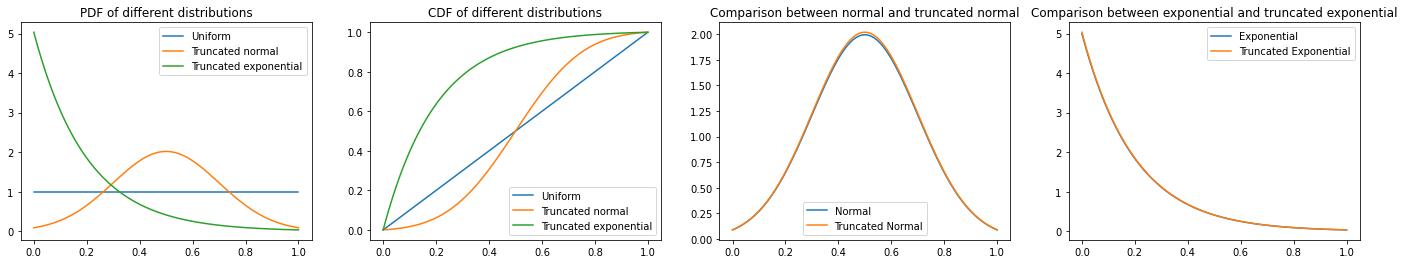

In [5]:
# Uniform distribution
def uniform():
    return stats.uniform()

# Truncated normal distribution
def trunc_norm(mean=0.5, std=0.2):
    a, b, mu, sig = 0, 1, mean, std
    ### --- Code adapted from https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.truncnorm.html#notes
    a, b = (a - mu) / sig, (b - mu) / sig
    ### --- It updates the boundaries of the normal distribution based on the mean and std
    xdistr = stats.truncnorm(a, b, loc=mu, scale=sig)
    return xdistr

# Truncated exponential
def trunc_expon(scale=0.2):
    return stats.truncexpon(1/scale, loc=0, scale=scale)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
multiply_fig_size(fig, 1, 4)

# Visualise uniform distribution
uniform_distr = uniform()
_, line = plot_distr_pdf(uniform_distr, ax=ax1)
line.set_label("Uniform")
_, line = plot_distr_cdf(uniform_distr, ax=ax2)
line.set_label("Uniform")

# Visualise truncated normal distribution
mean, std = 0.5, 0.2
trunc_norm_distr = trunc_norm(mean, std)
uniform_distr = uniform()
_, line = plot_distr_pdf(trunc_norm_distr, ax=ax1)
line.set_label("Truncated normal")
_, line = plot_distr_cdf(trunc_norm_distr, ax=ax2)
line.set_label("Truncated normal")

normal_distr = stats.norm(loc=mean, scale=std)
print(f"A normal distribution with mean {mean} and std {std} has 99% of its values in the range [{normal_distr.ppf(0.005)}, {normal_distr.ppf(0.995)}]")

# Plot difference between normal and truncated_normal
plot_distr_pdf(normal_distr, ax=ax3)[1].set_label("Normal")
plot_distr_pdf(trunc_norm_distr, ax=ax3)[1].set_label("Truncated Normal")
ax3.set_title("Comparison between normal and truncated normal")
ax3.legend()

# Visualise truncated exponential distribution
scale = 0.20
trunc_expon_distr = trunc_expon(scale)
_, line = plot_distr_pdf(trunc_expon_distr, ax=ax1)
line.set_label("Truncated exponential")
_, line = plot_distr_cdf(trunc_expon_distr, ax=ax2)
line.set_label("Truncated exponential")

expon_distr = stats.expon(scale=scale)
print(f"A exponential distribution with scale {scale} has 99% of its values in range [0, {expon_distr.ppf(0.99)}]")

# Plot difference between exponential and exponential
plot_distr_pdf(expon_distr, ax=ax4)[1].set_label("Exponential")
plot_distr_pdf(trunc_expon_distr, ax=ax4)[1].set_label("Truncated Exponential")
ax4.set_title("Comparison between exponential and truncated exponential")
ax4.legend()


distrs = [uniform_distr, trunc_norm_distr, trunc_expon_distr]
distr_names = ["uniform", "truncated normal", "truncated exponential"]

ax1.set_title("PDF of different distributions")
ax2.set_title("CDF of different distributions")
ax1.legend()
ax2.legend()


### Algorithms
We'll attempt to fit the target functions using different regression algorithms.
The first algorithms we'll use is the Kernel Ridge Regression algorithm. As the name suggests this is a Ridge Regression algorithm that uses the kernel trick to transform data to a (higher dimension) feature space. The Ridge Regression algorithm fits the data


#### SVR
The first algorithm we'll be using is the support vector regressor (SVR). It is an extension to the support vector classifier (SVM) algorithm. 

Let $D = \{d_i | 1 \leq i \leq N\}$ be our training samples and $y = \{y_i | 1 \leq i \leq N\}$ their target values. The SVR learns a hypothesis

$$ f(x) = \sum_{i=1}^N(\alpha_i^{*} - \alpha_i)*(d_ix + 1)^p + b $$

Where the values for $\alpha_i, \alpha_i^{*}$ and $b$ are learned during training. The SVR searches the hypothesis space for the optimal values for all these parameters. Optimal values for these parameters are those that minimise the following objective function:

$$ C\sum_{i=1}^NL_\epsilon(y_i - F(d_i, w)) + ||w||^2 $$

The objective is a sum of 2 terms. The first being the $\epsilon$-insensitive loss between the prediction and target value. The second term is a regularisation term. The amount of regularisation can be controller by changing the $C$ parameter.
The $\epsilon$-insensitive loss function $L_\epsilon$ used in the objective function is defined as follows

$$ 
L_\epsilon(x) = \left\{
    \begin{array}{ll}
        0 & if |x| < \epsilon \\
        |x| - \epsilon & if |x| \geq \epsilon
    \end{array}
\right.
$$

In the case of our objective function, the loss will be zero if the error ($|y_i - F(d_i, w)|$) is smaller than $\epsilon$, otherwise the loss will be how much the error exceeds this limit.This can be interpreted as creating an $\epsilon$-wide boundary around $F$. Any point $(d_i, y_i)$ which lies in this boundary will not contribute to the objective function, and its corresponding $\alpha_i^{*}$ and $\alpha_i$ will be zero. Otherwise, atleast one of two will be non-zero, and we call $d_i$ a support vector. 

We can definitely see the similarities between this and the soft-margin SVM. In the soft-margin SVM, we have a margin that we want points to lie outside, and penalise the objective functions for any points that lie inside the margin. With SVR we do the opposite, we have a margin ($\epsilon$-wide boundary) that we want points to lie inside, and panalise the objective functions for any points that lie outside of it.

Finally, we can extend this algorithm to higher dimensional feature spaces using the kernel trick.

*(source: https://proceedings.neurips.cc/paper/1996/file/d38901788c533e8286cb6400b40b386d-Paper.pdf)*

Whereas many other ML-algorithms try to minimise $E_{in}$ subject to $|w| < \epsilon$, support vector machines instead directly attempt to minimise $|w|$, putting the condition on $E_{in}$ instead.

#### KNN
A K-Nearest-Neighbour (KNN) algorithm predicts the value for a point based on the points it is close to, its neighbours. Specifically, these algorithms provide the user with a tunable hyperparameter $k$ which determines how many of these neighbours we want to take into account.

A KNN classifier classifies a point as the majority label among its $k$ neighbours. Let $\{d_i | 1 \leq i \leq k\}$ be the $k$ training samples nearest to $x$ and $y = \{y_i | 1 \leq i \leq k\}$ their classifications.
$$  
    F(x) = sign(\sum_{i=1}^k y_i)
$$
Turning this into a regressor is simple. Instead of taking the sign of the sum of the output of our neighbours, we take the mean. Let $\{d_i | 1 \leq i \leq k\}$ be the $k$ training samples nearest to $x$ and $y = \{y_i | 1 \leq i \leq k\}$ their values.
$$  
    F(x) = \frac{\sum_{i=1}^k y_i}{k}
$$

*(source: )*

In [6]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

algorithm_names = ["SVR", "KNN"]

### Experiments on synthetic datasets
We can now start training and evaluating the algorithms using the different distributions of datapoints. We start by choosing a target function we want our models to learn. We then generate equally sized datasets for each of the different data distributions we are examining. Each algorithm is then trained on each dataset. 

Finally we evaluate the trained models. Since we know the target function in these examples, we can directly evaluate the models by generating some datapoints and their corresponding values. We choose these points uniformly spread over the [0, 1] domain. However, the original datasets was not always drawn from a uniform distribution. To fix this, we weigh the contribution of each datapoint to the final score by its value in the probability density function of the distribution we are examining. This way points that would have had only a small chance of being generate, contribute less to the final score. We repeat this process for multiple iterations and average over the scores for each algorithm-distribution pair to reduce variance on our results.

In [7]:
def generate_regression_data(n, target, xdistr=stats.uniform(), noise_var=0):
    noise_distr = stats.norm(scale=noise_var)
    x = xdistr.rvs(n)
    y = target(x)
    noise = noise_distr.rvs(n)
    y = y + noise
    return x, y

def plot_prediction(x, y, target_function, model, range=False, ax=plt):
    prediction = make_prediction_function(model)
    if not range:
        range = minmax(x)
    # Plot the target function
    if target_function:
        _, line = plot_function(target_function, range=range, ax=ax)
        line.set_label("Target function")
        line.set_color("r")
        line.set_linestyle("--")
    # Plot the predicted curve
    _, line = plot_function(prediction, range=range, ax=ax)
    line.set_label("Predicted")
    # Plot datapoints (+ support vectors in case of SVR)
    if type(model) == skl.svm._classes.SVR:
        support_vector_idx = model.support_
        support_vector_mask = np.zeros(len(x), dtype=bool)
        support_vector_mask[support_vector_idx] = True

        _, line = plot_data(np.array(x)[np.where(np.invert(support_vector_mask))], np.array(y)[np.where(np.invert(support_vector_mask))], ax=ax)
        line.set_label("Data points")

        support_vectors = np.array(x)[np.where(support_vector_mask)]
        support_vector_ys = np.array(y)[np.where(support_vector_mask)]
        _, line = plot_data(support_vectors, support_vector_ys, ax=ax)
        line.set_color("r")
        line.set_label("Support Vectors")
    else:
        _, line = plot_data(x, y, ax=ax)
        line.set_label("Data points")
    ax.legend()
            
def fit_models(x, y, svr_param={}, knn_param={}):
    #fit the SVR
    svr = SVR(**svr_param)
    svr.fit(X=x.reshape(-1, 1), y=y)

    #fit the KNN
    knn = KNeighborsRegressor(**knn_param)
    knn.fit(X=x.reshape(-1, 1), y=y)

    return svr, knn

def plot_results(result_dicts, axss):
    for result, distr, name, axs in zip(result_dicts.values(), distrs, result_dicts.keys(), axss):
        plot_results_for_distribution(result, distr, name, axs)    

def plot_results_for_distribution(result, distr, distr_name, axs):
    x, y, target_function, svr, knn = result['x'], result['y'], result['target'], result['svr'], result['knn']
    assert(len(axs) == 3)
    ax1, ax2, ax3 = axs
    if ax1:
        plot_distrs(x, distr, range=(0, 1), ax=ax1)
        ax1.set_title(f"CDFs for {distr_name} distribution")
    if ax2:
        plot_prediction(x, y, target_function, svr, range=(0, 1), ax=ax2)
        ax2.set_title(f"SVR on {distr_name} distribution")
    if ax3:
        plot_prediction(x, y, target_function, knn, range=(0, 1), ax=ax3)
        ax3.set_title(f"KNN on {distr_name} distribution")
    
def make_prediction_function(model):
    return lambda x: model.predict(x.reshape(-1, 1))

from sklearn.metrics import mean_squared_error

def run_1_iteration(target_function, ns, svr_param={}, knn_param={}):
    test_x = np.linspace(0, 1, 100).reshape(-1, 1)
    test_y = target_function(test_x)
    results = {}

    if not isinstance(ns, list):
        ns = [ns, ns, ns]
    
    for n, distr, name in zip(ns, distrs, distr_names):
        x, y = generate_regression_data(n, target_function, xdistr=distr, noise_var=0.1)
        svr, knn = fit_models(x, y, svr_param, knn_param)

        weights = distr.pdf(test_x)
        #svr_score, knn_score = svr.score(test_x, test_y, weights), knn.score(test_x, test_y, weights)
        svr_score = mean_squared_error(test_y, svr.predict(test_x), sample_weight=weights)
        knn_score = mean_squared_error(test_y, knn.predict(test_x), sample_weight=weights)
        results[name] = {"target":target_function, "x":x, "y":y, "svr":svr, "knn":knn, "svr_score":svr_score, "knn_score":knn_score}

    return results

def plot_iteration_results(iteration_results):
    nrows, ncols = 3, 3
    fig, axss = plt.subplots(3, 3)
    multiply_fig_size(fig, nrows, ncols)
    plot_results(iteration_results, axss) 

    scores = [[distr_name, distr_result['svr_score'], distr_result['knn_score']] for distr_name, distr_result in iteration_results.items()]
    df = pd.DataFrame(np.reshape(scores, (-1, 3)), columns=["Distributions", "SVR", "KNN"])
    df = df.astype({"SVR": float, "KNN": float})
    print(df)

def average_results(results):
    scores = [
        [[distr_name, distr_result['svr_score'], distr_result['knn_score']] for distr_name, distr_result in result.items()] for result in results
    ]
    df = pd.DataFrame(np.reshape(scores, (-1, 3)), columns=["Distributions", "SVR", "KNN"])
    df = df.astype({"SVR": float, "KNN": float})
    df = df.groupby("Distributions")[["SVR", "KNN"]].mean()
    df = df.reindex(["uniform", "truncated normal", "truncated exponential"])
    return df


For the experiments on synthetical data, the target function will be a simple linear function.

In [8]:
# Linear target function
num_datapoints = 50
n_iterations = 100
results = []
for _ in range(n_iterations):
    # Target function
    target_function = lambda x: x - 0.5
    results.append(run_1_iteration(target_function, num_datapoints, {}, {}))

In the cell below you can see the results after running 100 iterations. We can see that on average models trained on uniform distribution of points perform better those trained on the normal and exponential distributions. Looking at the graphs we can see why this is. 

For SVR the fault lies with the chosen kernel function. When there are few datapoints, the model overfits, causing dips or rises in the target function. The same thing happens for the KNN algorithm. At the extrema, where there are fewer datapoints, the decision function flattens out.

Remember that during evaluation the evaluation points are weighted with their corresponding value in the PDF. For example for the normal distribution, this means points near the edges contribute less to the total error, and the points in the center contribute more. Even with this taken into account, the errors for the normal and exponential distribution are still higher than those for the uniform. This suggests that the extra accuracy gained in the center, does not make up for the accuracy lost near the edges.

		---- Average over 100 iterations (mean_squared_error) ----
                             SVR       KNN
Distributions                            
uniform                0.001683  0.002512
truncated normal       0.003159  0.002949
truncated exponential  0.004359  0.003903

		---- Results for iteration 1 (mean_squared_error) ----
           Distributions       SVR       KNN
0                uniform  0.001559  0.002749
1       truncated normal  0.000601  0.001829
2  truncated exponential  0.009399  0.004145


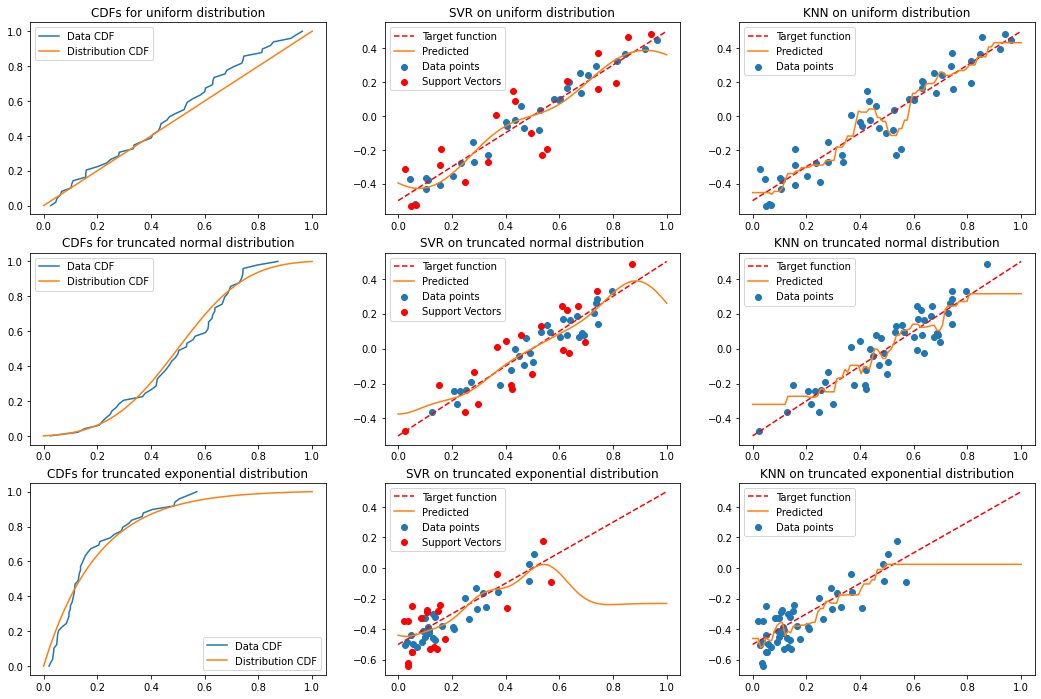

In [9]:
# I invite the reader to change the values below to look at the results for a different iterations
chosen_iteration = 1

df = average_results(results)
print(f"\t\t---- Average over {n_iterations} iterations (mean_squared_error) ----\n", df)
print(f"\n\t\t---- Results for iteration {chosen_iteration} (mean_squared_error) ----")
plot_iteration_results(results[chosen_iteration])

The cell below shows that the we get similar results as above when:

1. We have more data
2. We have less data
3. We're using a linear kernel for SVR

In [10]:
print("-------- Baseline --------")
df = average_results(results)
print(f"\t\t---- Average over {n_iterations} iterations (mean_squared_error) ----\n", df)

print("-------- More training data --------")
num_datapoints = 100
n_iterations = 100
results = []
for _ in range(n_iterations):
    # Target function
    target_function = lambda x: x - 0.5
    results.append(run_1_iteration(target_function, num_datapoints, {}, {}))

df = average_results(results)
print(f"\t\t---- Average over {n_iterations} iterations (mean_squared_error) ----\n", df)

print("-------- Less training data --------")
num_datapoints = 25
n_iterations = 200
results = []
for _ in range(n_iterations):
    # Target function
    target_function = lambda x: x - 0.5
    results.append(run_1_iteration(target_function, num_datapoints, {}, {}))

df = average_results(results)
print(f"\t\t---- Average over {n_iterations} iterations (mean_squared_error) ----\n", df)

print("-------- Using a linear kernel --------")
num_datapoints = 50
n_iterations = 100
results = []
for _ in range(n_iterations):
    # Target function
    target_function = lambda x: x - 0.5
    results.append(run_1_iteration(target_function, num_datapoints, {'kernel':'linear'}, {}))

df = average_results(results)
print(f"\t\t---- Average over {n_iterations} iterations (mean_squared_error) ----\n", df)

-------- Baseline --------
		---- Average over 100 iterations (mean_squared_error) ----
                             SVR       KNN
Distributions                            
uniform                0.001683  0.002512
truncated normal       0.003159  0.002949
truncated exponential  0.004359  0.003903
-------- More training data --------
		---- Average over 100 iterations (mean_squared_error) ----
                             SVR       KNN
Distributions                            
uniform                0.000976  0.002019
truncated normal       0.001426  0.002399
truncated exponential  0.002032  0.002745
-------- Less training data --------
		---- Average over 200 iterations (mean_squared_error) ----
                             SVR       KNN
Distributions                            
uniform                0.004855  0.004768
truncated normal       0.006582  0.004927
truncated exponential  0.007282  0.006725
-------- Using a linear kernel --------
		---- Average over 100 iterations (mean_sq

From these experiments it is seems that on a linear dataset having uniformly distributed training data is preferable over a normally or exponentially distributed data. Now we can ask ourselves what we can do if our data isn't uniformly distributed. One solution would be to simply collect more data, preferably with the aim of making the dataset more uniformly distributed. However, it is not always possible to get more data so we'll have to look for another solution. We could also do the opposite; we could drop some of the data. This would be a valid solution if the accuracy you gain by making the dataset uniformly distributed is greater than the accuracy you lose by reducing the size of the training data. 

In the cell below we did a little experiment to check this theory. Here we compare having a uniform distribution with the non-uniformly distributed data that is twice the size. The idea behind it is that we got to the uniformly distributed dataset by dropping points from the other two. You might see in the plots below that even after dropping half the datapoints, the extrema of the non-uniformly distributed still look less dense than the uniformly distributed dataset. On top of that, we see that for the uniformly distributed data, the errors are higher for the other two. This suggests that we lose more accuracy by dropping data, then we would have gained for making it uniformly distributed

-------- Reduced number of uniformly distributed points VS more non-uniformly distributed --------
		---- Average over 100 iterations (mean_squared_error) (Normal and Expontential have 100% more data) ----
                             SVR       KNN
Distributions                            
uniform                0.000205  0.001994
truncated normal       0.000143  0.002062
truncated exponential  0.000146  0.002004

		---- Results for iteration 0 (mean_squared_error) ----
           Distributions       SVR       KNN
0                uniform  0.000144  0.001831
1       truncated normal  0.000254  0.002295
2  truncated exponential  0.000121  0.001334


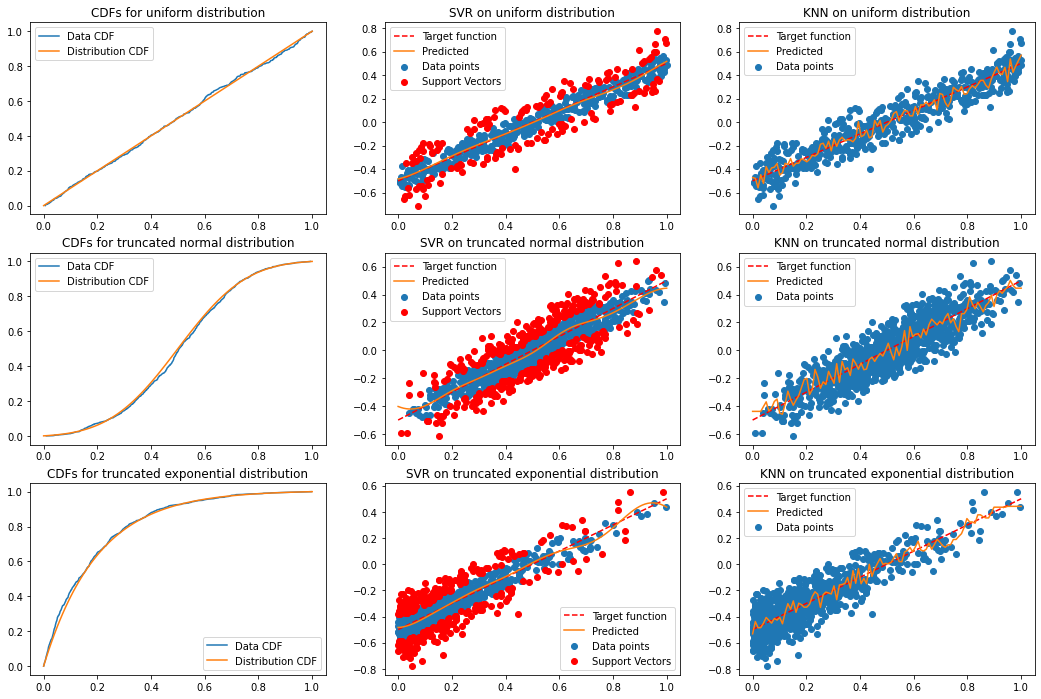

In [228]:
print("-------- Reduced number of uniformly distributed points VS more non-uniformly distributed --------")
num_datapoints = [500, 1000, 1000]
n_iterations = 100
results = []
for _ in range(n_iterations):
    # Target function
    target_function = lambda x: x - 0.5
    results.append(run_1_iteration(target_function, num_datapoints, {}, {}))


df = average_results(results)
chosen_iteration = 0
print(f"\t\t---- Average over {n_iterations} iterations (mean_squared_error) (Normal and Expontential have 100% more data) ----\n", df)
print(f"\n\t\t---- Results for iteration {chosen_iteration} (mean_squared_error) ----")
plot_iteration_results(results[chosen_iteration])

### Example on real dataset
Answering this research question is a challenging thing to do with real datasets since we don't have control over the distribution of the data. Nonetheless I will still apply these 2 algorithms to some real normally distributed datasets. The dataset we will be using consists of all kinds of different body measurements for possums. The plots in the cell below show how different features in the dataset compare to a normal distribution (with mean and standard deviation the mean and standard deviation of the data). Headlength, total length, tail length, eye size, chest girth and belly are all appear to be normally distributed. Using a statistical test we can confirm that the distributions of these features are not significantly different from a normal distribution.

*(data source = https://www.kaggle.com/datasets/abrambeyer/openintro-possum)*

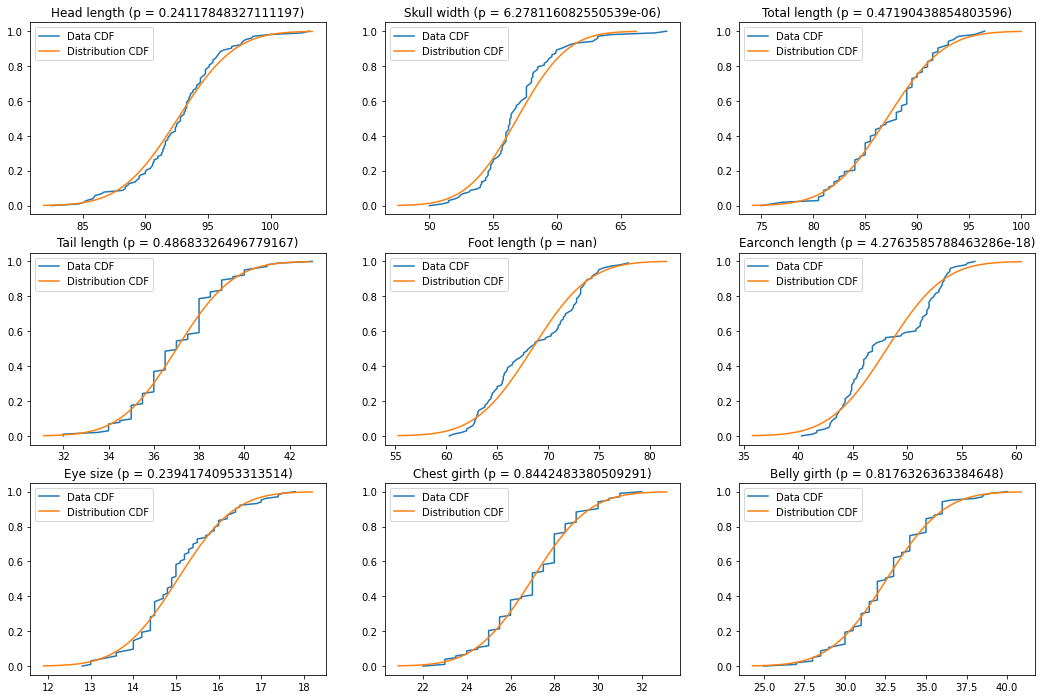

In [12]:
possum_data = pd.read_csv("./possum.csv")
#print(possum_data.head())
features = ["hdlngth", "skullw", "totlngth", "taill", "footlgth", "earconch", "eye", "chest", "belly"]
feature_display_name = ["Head length", "Skull width", "Total length", "Tail length", "Foot length", "Earconch length", "Eye size", "Chest girth", "Belly girth"]
fig, axs = plt.subplots(len(features)//3, 3)
multiply_fig_size(fig, len(features)//3, 3)

for feature, name, ax in zip(features, feature_display_name, axs.flatten()):
    feature_data = possum_data[feature]
    ax.set_title(f"{name} (p = {stats.normaltest(feature_data)[1]})")
    mean, std = feature_data.mean(), feature_data.std()
    length_distr = stats.norm(loc=mean, scale=std)
    plot_distrs(feature_data, length_distr, (mean-3*std, mean+3*std), ax)

We find many different regression tasks for this dataset. In this notebook we will look to predict a possum's skull width based on its total length.

(<module 'matplotlib.pyplot' from 'c:\\Users\\finsi\\miniconda3\\envs\\SFoML\\lib\\site-packages\\matplotlib\\pyplot.py'>,
 <matplotlib.collections.PathCollection at 0x20116e4b9d0>)

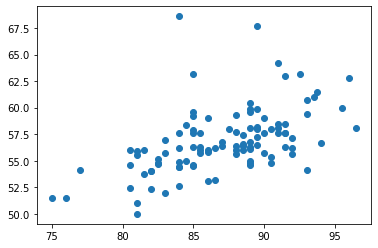

In [13]:
x = possum_data["totlngth"].to_numpy()
y = possum_data["skullw"].to_numpy()
plot_data(x, y)

Since we don't know the target function in this scenario, we can't generate datapoints for testing, and we'll have to set some of our data aside as a test set for later evaluation.

In [14]:
from sklearn.model_selection import train_test_split
# Setting the random state so the experiments results will be the same if the notebook is ran again
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)
x_train = x_train.reshape((-1, 1))
x_test = x_test.reshape((-1, 1))

We can now fine-tune the hyperparameters for our model. This can easily be done using a grid search with cross-validation on the training set. For SVR I manually checked every kernel to see which one performed best, which in this case was the linear kernel.

In [15]:
from sklearn.model_selection import GridSearchCV
# Kernels:  Linear  (0.39)
#           RBF     (0.33)
#           Poly    (0.38) (Really slow + didn't fine tune 'degree' hyperparameter)
#           Sigmoid (-0.03)
svr_gs = \
    GridSearchCV(SVR(), \
        {
            'epsilon': [0, 0.001, 0.01, 0.1, 0.5, 1, 2, 3, 4],
            'C': [0.01, 0.1, 1, 10, 20, 30, 40, 50, 100],
            'kernel': ['linear']
        })
svr_gs_result = svr_gs.fit(x_train, y_train)

knn_gs = \
    GridSearchCV(KNeighborsRegressor(), \
        {
            'n_neighbors': [1, 2, 3, 5, 10, 15, 20, 25, 30],
            'weights': ['uniform', 'distance'],
        })
knn_gs_result = knn_gs.fit(x_train, y_train)

Best parameters for SVR: {'C': 0.1, 'epsilon': 2, 'kernel': 'linear'}, score: 0.39053408225082437
Best parameters for KNN: {'n_neighbors': 10, 'weights': 'uniform'}, score: 0.30983069796446155


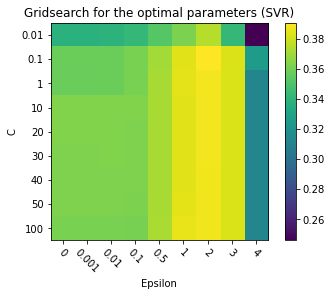

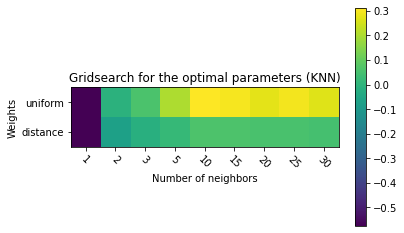

In [16]:
fig1, ax1 = plt.subplots(1, 1)
fig2, ax2 = plt.subplots(1, 1)

# Plot results for SVR
Epsilon, C = svr_gs_result.param_grid["epsilon"], svr_gs_result.param_grid["C"]

im = ax1.imshow(svr_gs_result.cv_results_["mean_test_score"].reshape(len(C), len(Epsilon)))
fig1.colorbar(im)

ax1.set_xlabel("Epsilon")
ax1.set_xticks(range(len(Epsilon)))
ax1.set_xticklabels(Epsilon, rotation=-45)
ax1.set_ylabel("C")
ax1.set_yticks(range(len(C)))
ax1.set_yticklabels(C)
ax1.set_title("Gridsearch for the optimal parameters (SVR)")

# Plot results for KNN
n_neighbors, weights = knn_gs_result.param_grid["n_neighbors"], knn_gs_result.param_grid["weights"]

im = ax2.imshow(np.transpose(knn_gs_result.cv_results_["mean_test_score"].reshape(len(n_neighbors), len(weights))))
fig2.colorbar(im)
ax2.set_xlabel("Number of neighbors")
ax2.set_xticks(range(len(n_neighbors)))
ax2.set_xticklabels(n_neighbors, rotation=-45)
ax2.set_ylabel("Weights")
ax2.set_yticks(range(len(weights)))
ax2.set_yticklabels(weights)
ax2.set_title("Gridsearch for the optimal parameters (KNN)")

svr_best_params = svr_gs_result.best_params_
print(f"Best parameters for SVR: {svr_gs_result.best_params_}, score: {svr_gs_result.best_score_}")

knn_best_params = knn_gs_result.best_params_
print(f"Best parameters for KNN: {knn_gs_result.best_params_}, score: {knn_gs_result.best_score_}")

Finally we examing the final hypothesis. Since we don't know the target function (if that were the case, why are we learning from data?), we can't calculated $E_out$. We can however estimate its value by evaluating on the test set. The scoring metric we use here (and during parameter tuning) is the coefficient of determination $R^2$. This is a measure of how well our model explains the variance in the data. A value of 1 means that the model perfectly predicts the data, and value of 0 means the model predicts the same outcome for every input. Since we have a value of around 0.12 for both models, this means the model does explain some of the variance in the data, but not all of it.

In the case of the KNN algorithm, we see the same effect of the normally distributed data as we had in the synthetic dataset experiments. For low and high length values, the prediction curve starts to flatten out, even though we might expect the target function to be linear (assuming possum's heads grow as they grow in length).

SVR's score on the test set: 0.12633035321124908
KNN's score on the test set: 0.16632250220876477


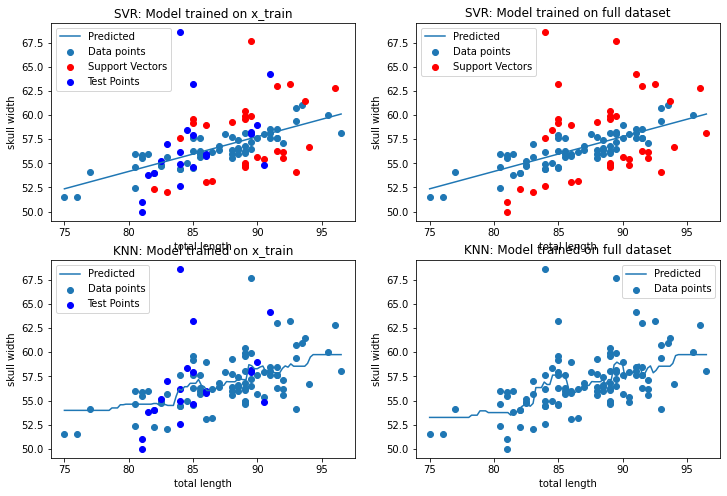

In [17]:
# Create some plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
multiply_fig_size(fig, 2, 2)
for ax in (ax1, ax2, ax3, ax4):
    ax.set_xlabel("total length")
    ax.set_ylabel("skull width")

# Fit models using the optimal parameters
svr = SVR(**svr_best_params)
svr.fit(x_train, y_train)
knn = KNeighborsRegressor(**knn_best_params)
knn.fit(x_train, y_train)

# Score the models on the test set
score = svr.score(x_test, y_test)
print(f"SVR's score on the test set: {score}")
score = knn.score(x_test, y_test)
print(f"KNN's score on the test set: {score}")

# Plot results for the train_data model...
ax1.set_title("SVR: Model trained on x_train")
plot_prediction(x_train, y_train, False, svr, ax=ax1)
ax1.scatter(x_test, y_test, c="b", label="Test Points")
ax1.legend()
ax3.set_title("KNN: Model trained on x_train")
plot_prediction(x_train, y_train, False, knn, ax=ax3)
ax3.scatter(x_test, y_test, c="b", label="Test Points")
ax3.legend()

# And the full data model
ax2.set_title("SVR: Model trained on full dataset")
plot_prediction(x, y, False, SVR(**svr_best_params).fit(x.reshape((-1, 1)), y), ax=ax2)
ax4.set_title("KNN: Model trained on full dataset")
plot_prediction(x, y, False, KNeighborsRegressor(**knn_best_params).fit(x.reshape((-1, 1)), y), ax=ax4)

### Conclusion
It is preferable to have uniformly distributed data when doing regression. If the data you have is not uniformly distributed, and no new data can be collected, just use the data you already have.


## Research Question 3


### Experiments on real data
For the real data part of this research question we will be using the foodtruck dataset (Rivolli, A. et al. 2017). The dataset contains the results of a questionnaire about food truck preferences. It contains a total of 407 instances, 1 for each person answering the questionnaire, 21 attributes, and 12 labels. The list below gives a short explanation for each of the attributes and labels:
| attribute(s)/labels | Explanation |
| --- |---  |
|frequency|Frequency of eating at a food truck (0: rarely, 1: monthly, 2: weekly, 3: twice a week, 4: daily)|
|time|Prefered time to eat at a food truck.|
|expenses|How much money they spend (number is the maximum amount of money in Brazilian reals.|
|motivation|In the paper this is explained as "what is the motivation", I'm not too sure what this means.|
|taste, hygiene, menu, presentation, attendance, ingredients, place.to.sit, takeaway, variation, stop.strucks (sic), schedule| How important do they find these 11 different qualities of a food truck on a scale of 1-5 (more information can be found in the paper).|
|gender, age.group, scholarity, average.income, has.work, marital.status| Answers to the 6 profiling questions |
|arabic_food, brazilian_food, chinese_food, street_food, fitness_food, gourmet, healthy_food, italian_food, japanese_food, mexican_food, snacks, sweets_desserts|Food preference of the person (binary, multiple can be selected)|

Using this dataset we want to be able to recommend to a new person some food truck choices that they might like. Since we can recommend multiple different types of food for 1 individual, this will be a multi-label classification problem. The barplot in the graph below shows the percentage of people that chose each food option in the dataset.

Most of the features in the data have already been converted to some ordinal scale (e.g. importance of different foodtruck qualities) but others (e.g. time or motivation) are still categorical features on the nominal scale. We convert each of these categorical features to different features using a One-Hot Encoder. This will take a categorical feature with $x$ possible values and transform it to $x$ binary features, one for each possible value.

    0    1    2    3    4    5    6    7    8    9   ...   22   23   24   25  \
0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  2.0  2.0  0.0  2.0   
1  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  3.0  4.0  1.0  5.0   
2  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  3.0  4.0  1.0  4.0   
3  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  4.0  4.0  1.0  5.0   
4  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  1.0  1.0  0.0  1.0   

    26   27   28   29   30   31  
0  1.0  2.0  4.0  1.0  2.0  1.0  
1  2.0  3.0  4.0  3.0  5.0  3.0  
2  4.0  4.0  3.0  3.0  4.0  2.0  
3  4.0  4.0  4.0  4.0  5.0  1.0  
4  1.5  1.0  2.0  2.0  1.0  1.0  

[5 rows x 32 columns]


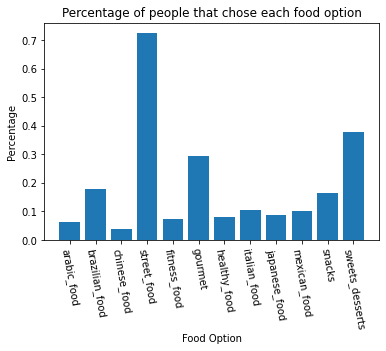

In [134]:
# From https://www.uco.es/kdis/mllresources/#FoodtruckDesc
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import type_of_target

foodtruck_data = arff.loadarff('foodtruck/foodtruck.arff')
df = pd.DataFrame(foodtruck_data[0])
all_labels = ['arabic_food', 'brazilian_food', 'chinese_food', 'street_food', 'fitness_food', 'gourmet', 'healthy_food', 'italian_food', 'japanese_food', 'mexican_food', 'snacks', 'sweets_desserts']
labels = all_labels
all_features = list(set(df.columns).difference(all_labels))
features = all_features

# --- Map labels to different datatype ---
for label in all_labels:
    df[label] = df[label].astype(int)

for attribute in ["time", "motivation", "gender", "marital.status"]:
    df[attribute] = df[attribute].astype(str)
    df[attribute] = df[attribute].map(lambda s: s[2:-1])

# --- Plot data imbalance ---
fig, ax = plt.subplots(1,1)
barplt = ax.bar(labels, [df[label].to_numpy().sum()/len(df) for label in labels])
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=-80)
ax.set_title("Percentage of people that chose each food option")
ax.set_xlabel("Food Option")
ax.set_ylabel("Percentage")

#X = X.drop(["time", "motivation", "taste", "hygiene", "menu", "presentation", "attendance", "ingredients", "place.to.sit", "takeaway", "variation", "stop.strucks", "schedule"], axis=1)
#print(type_of_target(Y))

# --- Preprocessing ---
X = df[features]
Y = df[labels]

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

categorical_attributes = ['time', 'motivation', 'gender', 'marital.status']
preprocessor = ColumnTransformer(
    transformers=[('categorical', OneHotEncoder(), categorical_attributes)],
    remainder='passthrough'
    )

X_trans = preprocessor.fit_transform(X, Y)
Y_trans = Y
X_train, X_test, Y_train, Y_test = train_test_split(X_trans, Y_trans, test_size=0.2, random_state=3)
X_train = pd.DataFrame(X_train)
Y_train = pd.DataFrame(Y_train)
print(X_train.head())

As the plot above clearly shows, there is a large label imbalance in this dataset. A lot of people said they liked street_food, gourmet, and sweets/deserts, but only a small amount of people chose the other options. This leads can lead to issues when learning later on. To resolve this we tried some over-sampling techniques to balance the dataset by increasing the number of occurences of the other labels. The first solution we found was MLSMOTE, which is a multi-label adaption of SMOTE (Synthetic Minority Over-sampling Technique). The implementation I found for this algorithm however didn't seem to work for me, as it transforms the feature- and label-vectors to new feature- and label-vectors of unequal size.

Length of X_train after upscaling: 178  - Length of Y_train after upscaling: 185


Text(0, 0.5, 'Percentage')

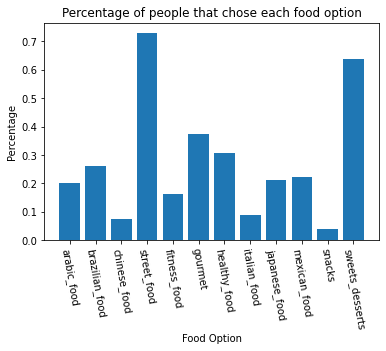

In [42]:
from MLSMOTE import mlsmote

X_sub, Y_sub = mlsmote.get_minority_instace(pd.DataFrame(X_train), pd.DataFrame(Y_train))
X_resampled, Y_resampled = mlsmote.MLSMOTE(X_sub, Y_sub, 100)

print("Length of X_train after upscaling:", len(X_resampled), " - Length of Y_train after upscaling:", len(Y_resampled))
fig, ax = plt.subplots(1,1)
barplt = ax.bar(labels, [Y_resampled[label].to_numpy().sum()/len(Y_resampled) for label in labels])
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=-80)
ax.set_title("Percentage of people that chose each food option")
ax.set_xlabel("Food Option")
ax.set_ylabel("Percentage")

In [62]:
from sklearn.utils import resample

def calculate_powerlabel(classes, y):
    idx = 1
    powerlabel = 0
    for i in range(classes):
        powerlabel += y[classes-(i+1)] * idx
        idx = idx * 2
    return powerlabel

def balance_multilabel_dataset(synthetic_data_x, synthetic_data_y, classes):
    synthetic_data_y['powerlabel'] = synthetic_data_y.apply(lambda x : calculate_powerlabel(classes, x),axis=1)
    synthetic_data = pd.concat([synthetic_data_x, synthetic_data_y], axis=1)
    powercount = {}
    powerlabels = np.unique(synthetic_data['powerlabel'])
    for p in powerlabels:
        powercount[p] = np.count_nonzero(synthetic_data['powerlabel']==p)
    maxcount = np.max(list(powercount.values()))
    for p in powerlabels:
        pc = powercount[p]
        if pc < maxcount:
            minority_upsampled = resample(synthetic_data[synthetic_data['powerlabel']==p], replace=True, n_samples=maxcount, random_state=123) 
            synthetic_data = pd.concat([synthetic_data[synthetic_data['powerlabel']!=p], minority_upsampled])

    synthetic_data = synthetic_data.sample(frac=1).reset_index(drop=True)
    synthetic_data_x = synthetic_data.iloc[:,:-(classes+1)]
    synthetic_data_y = synthetic_data.iloc[:,len(synthetic_data_x.columns):-1]

    return synthetic_data_x, synthetic_data_y

X_resampled, Y_resampled = balance_multilabel_dataset(pd.DataFrame(X_train), pd.DataFrame(Y_train), 12)
X_resampled, Y_resampled = pd.DataFrame(X_resampled), pd.DataFrame(Y_resampled)
print(Y_resampled.columns)
print("Length of X_train after upscaling:", len(X_resampled), " - Length of Y_train after upscaling:", len(Y_resampled))
fig, ax = plt.subplots(1,1)
barplt = ax.bar(labels, [Y_resampled[label].to_numpy().sum()/len(Y_resampled) for label in labels])
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=-80)
ax.set_title("Percentage of people that chose each food option")
ax.set_xlabel("Food Option")
ax.set_ylabel("Percentage")

KeyError: nan

In [131]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, f1_score

def analyse_results(Y_pred, Y_test):
    diff = Y_pred - Y_test
    
    diffr = np.sum(abs(diff), axis=0)/len(Y_test)
    pos_in_test = np.sum(Y_test, axis=0)/len(Y_test)
    pos_in_pred = np.sum(Y_pred, axis=0)/len(Y_test)
    true_pos = np.sum(Y_pred + Y_test == 2, axis=0)/len(Y_test)
    false_pos = np.sum(diff > 0, axis=0)/len(Y_test)
    true_neg = np.sum(Y_pred + Y_test == 0, axis=0)/len(Y_test)
    false_neg = np.sum(diff < 0, axis=0)/len(Y_test)
    results_df = pd.DataFrame(
        np.transpose(np.array([diffr, true_pos, true_neg, false_pos, false_neg, pos_in_test, pos_in_pred], dtype=object)), 
        columns=['error', 'true_pos', 'true_neg', 'false_pos', 'false_neg', 'pos_in_test', 'pos_in_pred'])
    return results_df

f1_scorer = make_scorer(skl.metrics.f1_score, average='weighted', zero_division=0)
hamming_loss_scorer = make_scorer(skl.metrics.hamming_loss, greater_is_better=False)
#accuracy = skl.metrics.hamming_loss(pd.DataFrame(np.array(test_data_y)), pd.DataFrame(synthetic_data_y_pred))


When we want to tune our hyperparemeters using a gridsearch, we need to specify a scoring metric that our models will be evaluated with. We started with the accuracy score that comes as a default with our models. 

In [225]:
# Estimated runtime: 51s
from sklearn.neighbors import KNeighborsClassifier
from skmultilearn.adapt import MLkNN
from sklearn.model_selection import GridSearchCV

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

knn_pipe = Pipeline([
    #('preprocessor', preprocessor),
    ('knn', MLkNN())
])

knn_gs = \
    GridSearchCV(knn_pipe, \
        {
            'knn__k': [1, 2, 5, 10, 20, 50, 100, 150, 200, 250],
            'knn__s': [0, 0.5, 1],
        },
        )

knn_gs_result = knn_gs.fit(X_train, np.array(Y_train))

One of the issues that occurs when we use this scoring metric is that our model learns a very uninteresting hypothesis. As you can see in the cell below, the gridsearch results finds the optimal value for k (the number of neighbors) to be 250, which is almost the same as the size of the training dataset! This results in a learned hypothesis that (almost) always gives the same classifications. You can see this in the table produced by the cell below. This table contains 1 row for each label in the data and shows for each of these labels a couple of values. The values in the columns are for each label: the fraction of misclassifications, the fraction of true positives, the fraction of true negatives, the fraction of false negatives, the fraction of false negatives, the fraction of positive classifications in the test set, and the fraction of positive classification in the predictions.

In the last column of this table you can see that the model always predicts label 3 (street_food) to be positive and it almost always predicts the other labels to be negative. As we'll see in the next couple of cells, this is not a limitation of the MLkNN algorithm, but instead a result of our dataset being imbalanced and chosen scoring metric.

--- MLkNN with default scorer ---
{'knn__k': 250, 'knn__s': 0.5}
accuracy score:  0.21951219512195122
0.2892307692307693
--- Label information  ---
Mean error:  0.15955284552845528


,error,true_pos,true_neg,false_pos,false_neg,pos_in_test,pos_in_pred
0,0.036585,0.0,0.963415,0.0,0.036585,0.036585,0.0
1,0.182927,0.0,0.817073,0.0,0.182927,0.182927,0.0
2,0.02439,0.0,0.97561,0.0,0.02439,0.02439,0.0
3,0.304878,0.695122,0.0,0.304878,0.0,0.695122,1.0
4,0.073171,0.0,0.926829,0.0,0.073171,0.073171,0.0
5,0.317073,0.012195,0.670732,0.036585,0.280488,0.292683,0.04878
6,0.04878,0.0,0.95122,0.0,0.04878,0.04878,0.0
7,0.097561,0.0,0.902439,0.0,0.097561,0.097561,0.0
8,0.109756,0.0,0.890244,0.0,0.109756,0.109756,0.0
9,0.158537,0.0,0.841463,0.0,0.158537,0.158537,0.0


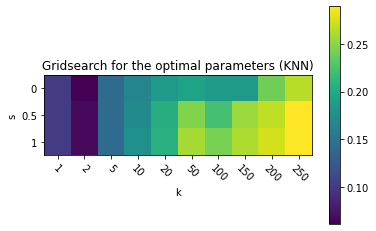

In [226]:
fig, ax = plt.subplots(1, 1)
print("--- MLkNN with default scorer ---")
print(knn_gs_result.best_params_)

# --- Plot grid search results ---
k, s = knn_gs_result.param_grid["knn__k"], knn_gs_result.param_grid["knn__s"]
im = ax.imshow(np.transpose(knn_gs_result.cv_results_["mean_test_score"].reshape(len(k), len(s))))
fig.colorbar(im)
ax.set_xlabel("k")
ax.set_xticks(range(len(k)))
ax.set_xticklabels(k, rotation=-45)
ax.set_ylabel("s")
ax.set_yticks(range(len(s)))
ax.set_yticklabels(s)
ax.set_title("Gridsearch for the optimal parameters (KNN)")

# --- Evaluate ---
#knn_pipe.fit(np.array(X_train), np.array(Y_train))
Y_pred = knn_gs.best_estimator_.predict(X_test).toarray()

print("accuracy score: ", knn_gs_result.best_estimator_.score(X_test, Y_test))

print("--- Label information  ---")
results = analyse_results(pd.DataFrame(np.array(Y_pred)), pd.DataFrame(np.array(Y_test)))
print("Mean error: ", np.mean(results["error"]))
results

Since the default accuracy_score metric provided very unsatisfactory results, we changed to a different metric. In the cell below we do the same gridsearch, this time using the f1_score metric.

In [146]:
# Estimated runtime: 51s
from sklearn.neighbors import KNeighborsClassifier
from skmultilearn.adapt import MLkNN
from sklearn.model_selection import GridSearchCV

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

knn_pipe = Pipeline([
    #('preprocessor', preprocessor),
    ('knn', MLkNN())
])

knn_gs = \
    GridSearchCV(knn_pipe, \
        {
            'knn__k': [1, 2, 5, 10, 20, 50, 100, 150, 200, 250],
            'knn__s': [0, 0.5, 1],
        }, scoring=f1_scorer
    )

knn_gs_result = knn_gs.fit(X_train, np.array(Y_train))

This time the gridsearch ends up finding 1 to be the optimal value for $k$. With such a low value for $k$ there is a good chance the model is overfitting. Looking at the table in the cell below we see that the model is now predicting positive values for these other labels aswell, at the cost of also increasing the number of false positives. When we look at the mean of all the error fractions, we see that it is above 0.05 higher than when we used the accuracy scoring metric.

--- MLkNN with f1 scorer ---
Grid search optimal parameters:  {'knn__k': 1, 'knn__s': 0}
f1_score:  0.46663092444735416
--- Label information  ---
Mean error:  0.20020325203252032


,error,true_pos,true_neg,false_pos,false_neg,pos_in_test,pos_in_pred
0,0.109756,0.0,0.890244,0.073171,0.036585,0.036585,0.073171
1,0.256098,0.036585,0.707317,0.109756,0.146341,0.182927,0.146341
2,0.04878,0.0,0.95122,0.02439,0.02439,0.02439,0.02439
3,0.317073,0.585366,0.097561,0.207317,0.109756,0.695122,0.792683
4,0.121951,0.012195,0.865854,0.060976,0.060976,0.073171,0.073171
5,0.256098,0.158537,0.585366,0.121951,0.134146,0.292683,0.280488
6,0.134146,0.0,0.865854,0.085366,0.04878,0.04878,0.085366
7,0.158537,0.012195,0.829268,0.073171,0.085366,0.097561,0.085366
8,0.146341,0.012195,0.841463,0.04878,0.097561,0.109756,0.060976
9,0.219512,0.02439,0.756098,0.085366,0.134146,0.158537,0.109756


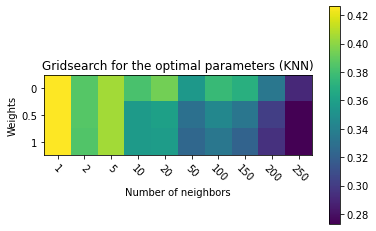

In [147]:
fig, ax = plt.subplots(1, 1)
print("--- MLkNN with f1 scorer ---")
print("Grid search optimal parameters: ", knn_gs_result.best_params_)

# --- Plot grid search results ---
k, s = knn_gs_result.param_grid["knn__k"], knn_gs_result.param_grid["knn__s"]
im = ax.imshow(np.transpose(knn_gs_result.cv_results_["mean_test_score"].reshape(len(k), len(s))))
fig.colorbar(im)
ax.set_xlabel("k")
ax.set_xticks(range(len(k)))
ax.set_xticklabels(k, rotation=-45)
ax.set_ylabel("s")
ax.set_yticks(range(len(s)))
ax.set_yticklabels(s)
ax.set_title("Gridsearch for the optimal parameters (KNN)")

# --- Evaluate ---
#knn_pipe.fit(np.array(X_train), np.array(Y_train))
Y_pred = knn_gs.best_estimator_.predict(X_test).toarray()

print("f1_score: ", f1_scorer(knn_gs.best_estimator_, X_test, Y_test))
#print(np.sum([all(clas == np.array([0,0,0,1,0,0,0,0,0,0,0,0])) for clas in np.array(Y_test)])/len(Y_test))

print("--- Label information  ---")
results = analyse_results(pd.DataFrame(np.array(Y_pred)), pd.DataFrame(np.array(Y_test)))
print("Mean error: ", np.mean(results["error"]))
results

We see the same results for the SVC algorithm. Here there parameter that controls the amount of regularisation is $C$. Again, we see that when we use the default accuracy score, the gridsearch finds low $C$ (high regularisation) to get the highest scores. However, when we use the f1 score, the grid search leads to low values for $C$ (low regularisation). 

In [183]:
# Estimated runtime: 7s
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import MinMaxScaler

svc_pipe = Pipeline([
    #('preprocessor', preprocessor),
    ('scaler', MinMaxScaler()),
    ('svc', MultiOutputClassifier(SVC()))
])

svc_gs = \
    GridSearchCV(svc_pipe, \
        {
            'svc__estimator__C': [1e-20, 1e-10, 1e-02, 5e-02, 1e-01, 5e-01, 1, 2, 5, 10, 20, 50, 100],
            'svc__estimator__kernel': ['rbf', 'linear']
        })

svc_gs_result = svc_gs.fit(X_train, Y_train)

Notice the we see the same thing that happened when using this scoring metric with MLkNN. In this case the effect is even worse.

--- SVC with default scorer ---
Grid search optimal parameters:  {'svc__estimator__C': 1e-20, 'svc__estimator__kernel': 'rbf'}
accuracy score:  0.25609756097560976
--- Label information  ---
Mean error:  0.15345528455284554


,error,true_pos,true_neg,false_pos,false_neg,pos_in_test,pos_in_pred
0,0.036585,0.0,0.963415,0.0,0.036585,0.036585,0.0
1,0.182927,0.0,0.817073,0.0,0.182927,0.182927,0.0
2,0.02439,0.0,0.97561,0.0,0.02439,0.02439,0.0
3,0.304878,0.695122,0.0,0.304878,0.0,0.695122,1.0
4,0.073171,0.0,0.926829,0.0,0.073171,0.073171,0.0
5,0.292683,0.0,0.707317,0.0,0.292683,0.292683,0.0
6,0.04878,0.0,0.95122,0.0,0.04878,0.04878,0.0
7,0.097561,0.0,0.902439,0.0,0.097561,0.097561,0.0
8,0.109756,0.0,0.890244,0.0,0.109756,0.109756,0.0
9,0.158537,0.0,0.841463,0.0,0.158537,0.158537,0.0


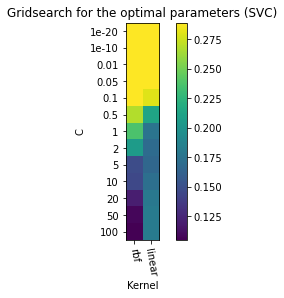

In [184]:
fig, ax = plt.subplots(1, 1)
print("--- SVC with default scorer ---")
print("Grid search optimal parameters: ", svc_gs_result.best_params_)

# --- Plot grid search results ---
Kernels, C = svc_gs_result.param_grid["svc__estimator__kernel"], svc_gs_result.param_grid["svc__estimator__C"]
im = ax.imshow(svc_gs_result.cv_results_["mean_test_score"].reshape(len(C), len(Kernels)))
fig.colorbar(im)
ax.set_xlabel("Kernel")
ax.set_xticks(range(len(Kernels)))
ax.set_xticklabels(Kernels, rotation=-80)
ax.set_ylabel("C")
ax.set_yticks(range(len(C)))
ax.set_yticklabels(C)
ax.set_title("Gridsearch for the optimal parameters (SVC)")

# --- Evaluate ---
#knn_pipe.fit(np.array(X_train), np.array(Y_train))
Y_pred = svc_gs.best_estimator_.predict(X_test)

print("accuracy score: ", svc_gs.best_estimator_.score(X_test, Y_test))
#print(np.sum([all(clas == np.array([0,0,0,1,0,0,0,0,0,0,0,0])) for clas in np.array(Y_test)])/len(Y_test))

print("--- Label information  ---")
results = analyse_results(pd.DataFrame(np.array(Y_pred)), pd.DataFrame(np.array(Y_test)))
print("Mean error: ", np.mean(results["error"]))
results


Now we do SVC with the f1 scoring.

In [189]:
# Estimated runtime: 7s
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import MinMaxScaler

svc_pipe = Pipeline([
    #('preprocessor', preprocessor),
    ('scaler', MinMaxScaler()),
    ('svc', MultiOutputClassifier(SVC()))
])

svc_gs = \
    GridSearchCV(svc_pipe, \
        {
            'svc__estimator__C': [1e-20, 1e-10, 1e-02, 5e-02, 1e-01, 5e-01, 1, 2, 5, 10, 20, 50, 100],
            'svc__estimator__kernel': ['rbf', 'linear']
        }, scoring=f1_scorer)

svc_gs_result = svc_gs.fit(X_train, Y_train)

Same results as using f1 scoring with MLkNN.

--- SVC with f1_score ---
Grid search optimal parameters:  {'svc__estimator__C': 50, 'svc__estimator__kernel': 'rbf'}
f1 score:  0.45679881675909983
--- Label information  ---
Mean error:  0.20833333333333334


,error,true_pos,true_neg,false_pos,false_neg,pos_in_test,pos_in_pred
0,0.097561,0.0,0.902439,0.060976,0.036585,0.036585,0.060976
1,0.292683,0.02439,0.682927,0.134146,0.158537,0.182927,0.158537
2,0.060976,0.0,0.939024,0.036585,0.02439,0.02439,0.036585
3,0.268293,0.597561,0.134146,0.170732,0.097561,0.695122,0.768293
4,0.060976,0.02439,0.914634,0.012195,0.04878,0.073171,0.036585
5,0.317073,0.134146,0.54878,0.158537,0.158537,0.292683,0.292683
6,0.146341,0.0,0.853659,0.097561,0.04878,0.04878,0.097561
7,0.195122,0.0,0.804878,0.097561,0.097561,0.097561,0.097561
8,0.195122,0.012195,0.792683,0.097561,0.097561,0.109756,0.109756
9,0.243902,0.012195,0.743902,0.097561,0.146341,0.158537,0.109756


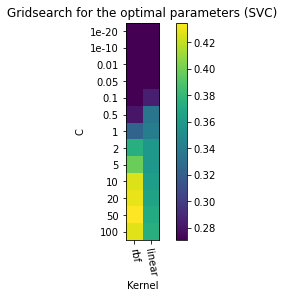

In [190]:
fig, ax = plt.subplots(1, 1)
print("--- SVC with f1_score ---")
print("Grid search optimal parameters: ", svc_gs_result.best_params_)

# --- Plot grid search results ---
Kernels, C = svc_gs_result.param_grid["svc__estimator__kernel"], svc_gs_result.param_grid["svc__estimator__C"]
im = ax.imshow(svc_gs_result.cv_results_["mean_test_score"].reshape(len(C), len(Kernels)))
fig.colorbar(im)
ax.set_xlabel("Kernel")
ax.set_xticks(range(len(Kernels)))
ax.set_xticklabels(Kernels, rotation=-80)
ax.set_ylabel("C")
ax.set_yticks(range(len(C)))
ax.set_yticklabels(C)
ax.set_title("Gridsearch for the optimal parameters (SVC)")

# --- Evaluate ---
#knn_pipe.fit(np.array(X_train), np.array(Y_train))
Y_pred = svc_gs.best_estimator_.predict(X_test)

print("f1 score: ", f1_scorer(svc_gs.best_estimator_, X_test, Y_test))
#print(np.sum([all(clas == np.array([0,0,0,1,0,0,0,0,0,0,0,0])) for clas in np.array(Y_test)])/len(Y_test))

print("--- Label information  ---")
results = analyse_results(pd.DataFrame(np.array(Y_pred)), pd.DataFrame(np.array(Y_test)))
print("Mean error: ", np.mean(results["error"]))
results

So why do both models underfit when we use the default accuracy score metric? To explain this we need to look at the distribution of the labels. The cell below print the top 10 most frequently occuring labellings and their fraction of occurence. As you can see, the dataset is dominated by instances that are labelled $[0,0,0,1,0,0,0,0,0,0,0,0]$. Since the accuracy scoring metric only considers an instance to be correctly classified if all its labels are correctly classified, the model can get a score of $0.2892$ by simply always predicting this labelling. This is exactly what we see happen, the maximum score reached in the gridsearch is exactly $0.289$ for both SVC and MLkNN.

Regardless of which of the two scoring metric you choose, the scores achieved by the specialised MLkNN and the adapted SVC algorithms almost the same.

In [223]:
def top_n_labellings(Y, n):
    labellings = np.unique(Y, axis=0)
    labelling_occurences = np.array([np.sum([all(clas == labelling) for clas in np.array(Y)])/len(Y) for labelling in labellings])
    sorting = np.argsort(labelling_occurences)
    labellings, labelling_occurences = labellings[sorting], labelling_occurences[sorting]
    for i in range(10):
        print(labellings[len(labellings) - i - 1], " - ", labelling_occurences[len(labellings) - i - 1])

print("Training set")
top_n_labellings(Y_train, 10)
print("Complete dataset")
top_n_labellings(Y, 10)

Training set
[0 0 0 1 0 0 0 0 0 0 0 0]  -  0.28923076923076924
[0 0 0 0 0 1 0 0 0 0 0 0]  -  0.06461538461538462
[0 0 0 1 0 1 0 0 0 0 0 1]  -  0.043076923076923075
[0 0 0 0 0 0 0 0 0 0 1 0]  -  0.04
[0 0 0 1 0 0 0 0 0 0 0 1]  -  0.04
[0 1 0 0 0 0 0 0 0 0 0 0]  -  0.04
[0 0 0 1 0 0 0 0 0 0 1 1]  -  0.027692307692307693
[0 0 0 1 0 0 0 0 0 0 1 0]  -  0.027692307692307693
[0 0 0 1 0 1 0 0 0 0 0 0]  -  0.021538461538461538
[0 0 0 0 0 0 0 0 0 0 0 1]  -  0.015384615384615385
Complete dataset
[0 0 0 1 0 0 0 0 0 0 0 0]  -  0.28255528255528256
[0 0 0 0 0 1 0 0 0 0 0 0]  -  0.05896805896805897
[0 1 0 0 0 0 0 0 0 0 0 0]  -  0.044226044226044224
[0 0 0 1 0 1 0 0 0 0 0 1]  -  0.044226044226044224
[0 0 0 1 0 0 0 0 0 0 0 1]  -  0.03931203931203931
[0 0 0 1 0 0 0 0 0 0 1 1]  -  0.036855036855036855
[0 0 0 0 0 0 0 0 0 0 1 0]  -  0.03194103194103194
[0 0 0 1 0 0 0 0 0 0 1 0]  -  0.02702702702702703
[0 0 0 1 0 1 0 0 0 0 0 0]  -  0.019656019656019656
[0 0 0 0 0 0 0 0 0 0 0 1]  -  0.014742014742014743


## References

### Data
Possum Regression. Retrieved May 30, 2022, from https://www.kaggle.com/datasets/abrambeyer/openintro-possum

Adriano Rivolli, Larissa C. Parker, and Andre C.P.L.F. de Carvalho. Food Truck Recommendation Using Multi-label Classification. In EPIA 2017: Progress in Artificial Intelligence, pages 585–596, 2017. Retrieved June 2, 2022, from https://www.uco.es/kdis/mllresources/


